# **Machine Learning**

From Udemy course '**Learning Phyton for Data Analysis and Visualization**' by Jose Portilla

### **2. Logistic regression 1**

In [54]:
import numpy as np
import math  # Math
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression  # Machine Learning Imports
from sklearn.model_selection import train_test_split
from sklearn import metrics  # For evaluating our ML results
import statsmodels.api as sm  # Dataset Import

In [21]:
def logistic(t):  # Logistic Function
    return 1.0 / (1 + math.exp((-1.0)*t))

**Set t from -6 to 6 ( 500 elements, linearly spaced)**

In [22]:
t = np.linspace(-6,6,500)
t

array([-6.        , -5.9759519 , -5.95190381, -5.92785571, -5.90380762,
       -5.87975952, -5.85571142, -5.83166333, -5.80761523, -5.78356713,
       -5.75951904, -5.73547094, -5.71142285, -5.68737475, -5.66332665,
       -5.63927856, -5.61523046, -5.59118236, -5.56713427, -5.54308617,
       -5.51903808, -5.49498998, -5.47094188, -5.44689379, -5.42284569,
       -5.3987976 , -5.3747495 , -5.3507014 , -5.32665331, -5.30260521,
       -5.27855711, -5.25450902, -5.23046092, -5.20641283, -5.18236473,
       -5.15831663, -5.13426854, -5.11022044, -5.08617234, -5.06212425,
       -5.03807615, -5.01402806, -4.98997996, -4.96593186, -4.94188377,
       -4.91783567, -4.89378758, -4.86973948, -4.84569138, -4.82164329,
       -4.79759519, -4.77354709, -4.749499  , -4.7254509 , -4.70140281,
       -4.67735471, -4.65330661, -4.62925852, -4.60521042, -4.58116232,
       -4.55711423, -4.53306613, -4.50901804, -4.48496994, -4.46092184,
       -4.43687375, -4.41282565, -4.38877756, -4.36472946, -4.34

**Set up y values (list comprehension)**

In [23]:
y = np.array([logistic(ele) for ele in t])
y

array([0.00247262, 0.00253265, 0.00259414, 0.00265711, 0.00272161,
       0.00278766, 0.00285532, 0.00292462, 0.00299559, 0.00306827,
       0.00314272, 0.00321897, 0.00329706, 0.00337703, 0.00345895,
       0.00354284, 0.00362875, 0.00371675, 0.00380687, 0.00389916,
       0.00399369, 0.0040905 , 0.00418964, 0.00429118, 0.00439516,
       0.00450166, 0.00461072, 0.00472241, 0.0048368 , 0.00495394,
       0.00507391, 0.00519676, 0.00532258, 0.00545142, 0.00558336,
       0.00571848, 0.00585685, 0.00599855, 0.00614366, 0.00629225,
       0.00644441, 0.00660023, 0.0067598 , 0.00692319, 0.0070905 ,
       0.00726183, 0.00743726, 0.0076169 , 0.00780085, 0.0079892 ,
       0.00818206, 0.00837954, 0.00858175, 0.00878879, 0.00900078,
       0.00921783, 0.00944007, 0.00966762, 0.0099006 , 0.01013913,
       0.01038335, 0.01063339, 0.01088938, 0.01115147, 0.01141979,
       0.01169449, 0.01197572, 0.01226363, 0.01255838, 0.01286011,
       0.013169  , 0.0134852 , 0.0138089 , 0.01414025, 0.01447

**The plot of logistic function!**

Text(0.5, 1.0, ' Logistic Function ')

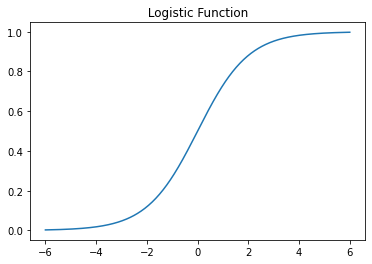

In [24]:
plt.plot(t,y)
plt.title(' Logistic Function ')

**Logistic regression 2**

In [49]:
np.array([_ for _ in dir(sm.datasets) if not _.startswith('__')])

array(['PytestTester', 'anes96', 'cancer', 'ccard', 'check_internet',
       'china_smoking', 'clear_data_home', 'co2', 'committee', 'copper',
       'cpunish', 'danish_data', 'elnino', 'engel', 'fair', 'fertility',
       'get_data_home', 'get_rdataset', 'grunfeld', 'heart',
       'interest_inflation', 'longley', 'macrodata', 'modechoice', 'nile',
       'randhie', 'scotland', 'spector', 'stackloss', 'star98',
       'statecrime', 'strikes', 'sunspots', 'test', 'utils', 'webuse'],
      dtype='<U18')

In [28]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [29]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [30]:
df['Had_Affair'] = df['affairs'].apply(affair_check)
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [35]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


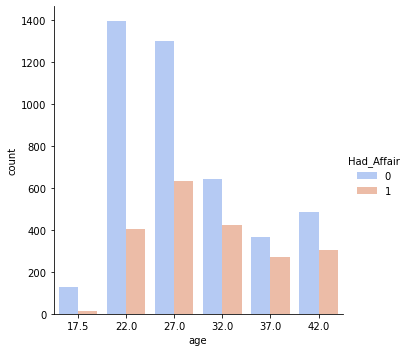

In [36]:
sns.catplot(x='age', hue='Had_Affair', data=df, palette='coolwarm', kind='count')

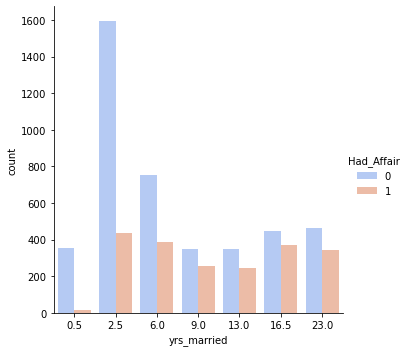

In [37]:
sns.catplot(x='yrs_married', data=df, hue='Had_Affair', palette='coolwarm', kind = 'count')

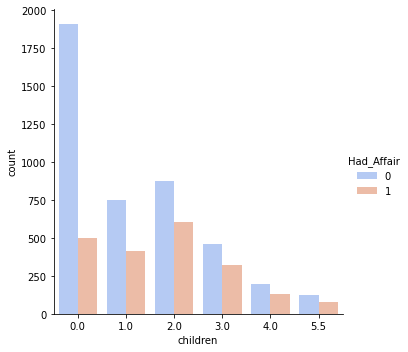

In [38]:
sns.catplot(x='children',data=df,hue='Had_Affair',palette='coolwarm', kind='count')

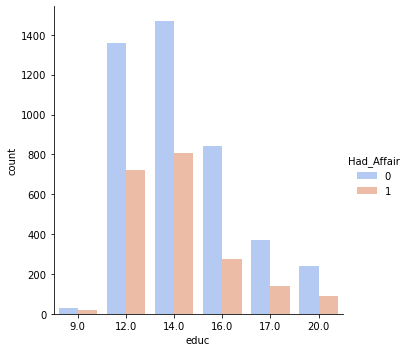

In [39]:
sns.catplot(x='educ',data=df,hue='Had_Affair',palette='coolwarm', kind='count')

**Logistic regression 3**

In [40]:
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies =pd.get_dummies(df['occupation_husb'])
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [41]:
hus_occ_dummies

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
6361,0,0,1,0,0,0
6362,0,0,0,0,1,0
6363,1,0,0,0,0,0
6364,0,0,0,1,0,0


In [42]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [43]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [44]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [45]:
X = pd.concat([X,dummies],axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [46]:
Y = df.Had_Affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [47]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

**Logistic regression 4 - Multicollinearity**

Dropping one column from each dummy variable set!

In [410]:
X = X.drop('occ1',axis=1)

In [411]:
X = X.drop('hocc1',axis=1)

**Drop affairs column so Y target makes sense**

In [412]:
X = X.drop('affairs',axis=1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [413]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [414]:
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
log_model = LogisticRegression()
log_model.fit(X,Y)

C:\Users\husey\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**We can increase maximum iteration!**

In [51]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X,Y)

LogisticRegression(max_iter=1000)

In [52]:
log_model.score(X,Y)
Y.mean()

0.3224945020420987

In [62]:
log_model.coef_

array([[-4.41718991e-01, -7.78650776e-02,  1.61353152e-01,
         6.23010112e-02, -2.33940569e-01,  2.41041969e-02,
         1.88044807e+01, -2.15962792e-01, -1.15739138e-01,
         1.20054394e-02,  1.85385938e-02,  1.43469747e-01,
         1.27710442e-01,  1.75020293e-01, -2.45001681e-01,
         9.87021665e-02,  1.10968653e-01,  1.59034831e-02,
        -1.85570622e-01]])

In [63]:
log_model.coef_.T

array([[-4.41718991e-01],
       [-7.78650776e-02],
       [ 1.61353152e-01],
       [ 6.23010112e-02],
       [-2.33940569e-01],
       [ 2.41041969e-02],
       [ 1.88044807e+01],
       [-2.15962792e-01],
       [-1.15739138e-01],
       [ 1.20054394e-02],
       [ 1.85385938e-02],
       [ 1.43469747e-01],
       [ 1.27710442e-01],
       [ 1.75020293e-01],
       [-2.45001681e-01],
       [ 9.87021665e-02],
       [ 1.10968653e-01],
       [ 1.59034831e-02],
       [-1.85570622e-01]])

In [61]:
DataFrame(zip(X.columns,log_model.coef_.T))

,0,1
0,rate_marriage,[-0.4417189906033718]
1,age,[-0.07786507764627894]
2,yrs_married,[0.16135315173771794]
3,children,[0.062301011221675855]
4,religious,[-0.2339405692419373]
5,educ,[0.02410419685305311]
6,affairs,[18.80448067919146]
7,occ1,[-0.2159627920298905]
8,occ2,[-0.11573913750649772]
9,occ3,[0.012005439411464399]


In [55]:
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))
coeff_df

,0,1
0,rate_marriage,[-0.4417189906033718]
1,age,[-0.07786507764627894]
2,yrs_married,[0.16135315173771794]
3,children,[0.062301011221675855]
4,religious,[-0.2339405692419373]
5,educ,[0.02410419685305311]
6,affairs,[18.80448067919146]
7,occ1,[-0.2159627920298905]
8,occ2,[-0.11573913750649772]
9,occ3,[0.012005439411464399]


In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [65]:
log_model2 = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model2.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [66]:
class_predict = log_model2.predict(X_test)
print(metrics.accuracy_score(Y_test,class_predict))

0.9798994974874372
